In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble


In [4]:
df = pd.read_csv(r'C:\Users\amuthumanikandan\PycharmProjects\Meachine Learning\Randomforest Algorithm/Randomtrain.csv')

In [6]:
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [8]:
df.shape

(59381, 128)

In [9]:
df['Response'].isnull().sum()

np.int64(0)

In [16]:
countss=df['Response'].value_counts()

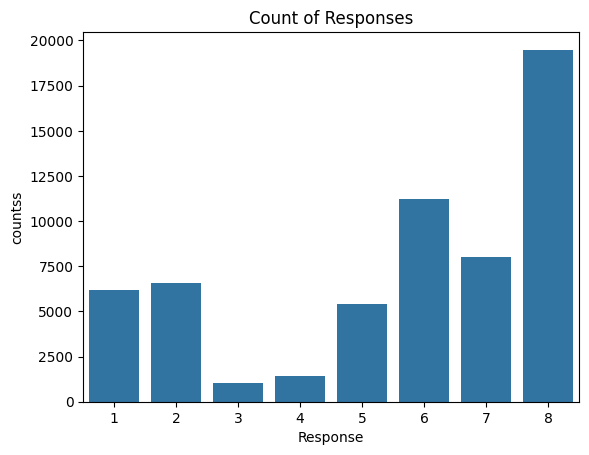

In [23]:
sns.countplot(x='Response',data=df)
plt.xlabel('Response')
plt.ylabel('countss')
plt.title('Count of Responses')
plt.show()

In [26]:
def modified_response(row):
  if ((row['Response'] <=7) & (row['Response'] >=0) ):
    val = 0
  elif (row['Response']==8):
    val = 1
  else:
    val = -1

  return val

In [28]:
df['Modified_Response'] = df.apply(modified_response,axis = 1)


In [31]:
df['Modified_Response'].value_counts()

Modified_Response
0    39892
1    19489
Name: count, dtype: int64

<Axes: xlabel='Modified_Response', ylabel='count'>

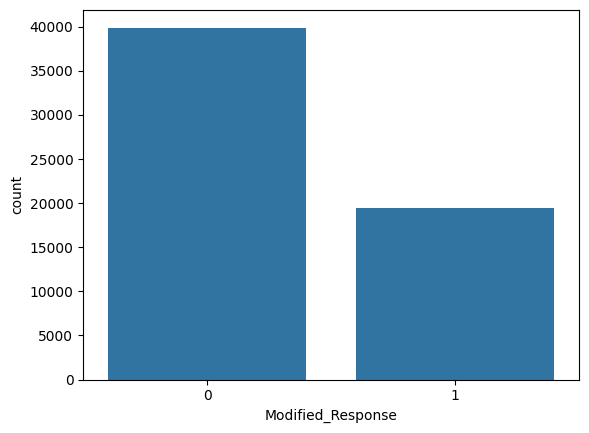

In [33]:
sns.countplot(x=df['Modified_Response'])

In [34]:
df.drop('Response',axis=1,inplace=True)

In [35]:
df.head

<bound method NDFrame.head of           Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0          2               1             D3              10        0.076923   
1          5               1             A1              26        0.076923   
2          6               1             E1              26        0.076923   
3          7               1             D4              10        0.487179   
4          8               1             D2              26        0.230769   
...      ...             ...            ...             ...             ...   
59376  79142               1             D1              10        0.230769   
59377  79143               1             D3              26        0.230769   
59378  79144               1             E1              26        0.076923   
59379  79145               1             D2              10        0.230769   
59380  79146               1             A8              26        0.076923   

       Product_Info_5

In [36]:
df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response_Binary,Modified_Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.0,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,1.0,0.328203
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,0.0,0.469563
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [37]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

In [39]:
#Dropping the null values column less than 40%
missing_values_count_by_column = df.isnull().sum()/len(df)
print(missing_values_count_by_column[missing_values_count_by_column > .4].sort_values(ascending=False)  )

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [40]:
df = df.dropna(thresh=df.shape[0]*.4,axis=1)

In [41]:
list(df.columns)

['Id',
 'Product_Info_1',
 'Product_Info_2',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_Hist

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 124 entries, Id to Modified_Response
dtypes: float64(13), int64(110), object(1)
memory usage: 56.2+ MB


In [43]:
df['Product_Info_2'].head(20)


0     D3
1     A1
2     E1
3     D4
4     D2
5     D2
6     A8
7     D2
8     D3
9     E1
10    D3
11    D4
12    A2
13    D1
14    D4
15    A7
16    D4
17    D3
18    D3
19    D4
Name: Product_Info_2, dtype: object

In [44]:
df['Product_Info_2'].value_counts()


Product_Info_2
D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: count, dtype: int64

In [45]:
df.drop('Product_Info_2',axis=1,inplace=True)

C:\Users\amuthumanikandan\AppData\Local\Temp\ipykernel_33764\2410462358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Product_Info_2',axis=1,inplace=True)


In [47]:
#Start building baseline models (Random Forest Classifier & XGBoost Classifier)
df.columns

Index(['Id', 'Product_Info_1', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_41', 'Medical_Keyword_42', 'Medical_Keyword_43',
       'Medical_Keyword_44', 'Medical_Keyword_45', 'Medical_Keyword_46',
       'Medical_Keyword_47', 'Medical_Keyword_48', 'Response_Binary',
       'Modified_Response'],
      dtype='object', length=123)

In [48]:
X=df.drop(labels='Modified_Response',axis=1)
y=df['Modified_Response']

In [49]:
X=X.fillna(X.mean())

In [50]:
X.shape, y.shape

((59381, 122), (59381,))

In [51]:
#Training & Testing
X_Test,X_train, y_test, y_train = train_test_split(X,y,test_size=0.25,random_state=1)

In [54]:
print(X_train.shape, y_train.shape)
print(X_Test.shape, y_test.shape)

(14846, 122) (14846,)
(44535, 122) (44535,)


In [55]:
X_train.isnull().sum()

Id                     0
Product_Info_1         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_2          0
Family_Hist_3          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0


In [ ]:
# Conversion factor
feet_to_mm = 304.8  # 1 foot = 304.8 mm

# Dimensions of the sheet (in feet, converted to mm)
sheet_width = 4 * feet_to_mm  # 4 feet = 1219.2 mm
sheet_height = 8 * feet_to_mm  # 8 feet = 2438.4 mm

# Dimensions of the piece to be cut (already in mm)
piece_width = 405  # mm
piece_height = 643  # mm

# Number of pieces required
pieces_required = 1

# Validate if the piece can fit onto the sheet in any orientation
if (piece_width > sheet_width and piece_width > sheet_height) or \
   (piece_height > sheet_width and piece_height > sheet_height):
    print("Error: The piece dimensions are larger than the sheet in both orientations.")
else:
    # Check both orientations to maximize the fit
    pieces_per_row = max(sheet_width // piece_width, sheet_width // piece_height)
    pieces_per_column = max(sheet_height // piece_height, sheet_height // piece_width)
    
    # Total pieces per sheet
    pieces_per_sheet = pieces_per_row * pieces_per_column

    if pieces_per_sheet == 0:
        print("Error: The pieces cannot fit on the sheet in any orientation.")
    else:
        # Calculate the number of sheets required
        sheets_required = -(-pieces_required // pieces_per_sheet)  # Ceiling division

        print(f"Pieces per sheet: {pieces_per_sheet}")
        print(f"Sheets required: {sheets_required}")


Pieces per sheet: 3.0
Sheets required: 27.0


In [74]:
from itertools import permutations

# Conversion factor
feet_to_mm = 304.8  # 1 foot = 304.8 mm

# Sheet dimensions (4 ft x 8 ft, converted to mm)
sheet_width = 4 * feet_to_mm  # 1219.2 mm
sheet_height = 8 * feet_to_mm  # 2438.4 mm

# Input sizes in mm (width x height) with 4 mm tolerance
inputs = [
    (405 + 4, 643 + 4),  # Add 4 mm tolerance
    (710 + 4, 915 + 4),
    (495 + 4, 328 + 4),
    (773 + 4, 418 + 4),
    (690 + 4, 405 + 4),
    (420 + 4, 470 + 4),
    (575 + 4, 1040 + 4)
]

# Function to attempt placing all pieces on the sheet
def fit_pieces_on_sheet(sheet_width, sheet_height, pieces):
    remaining_width = sheet_width
    remaining_height = sheet_height
    row_height = 0
    fitted_pieces = []  # Successfully placed pieces
    unfitted_pieces = []  # Pieces that couldn't fit

    for piece_width, piece_height in pieces:
        # Try placing the piece in the current row
        if piece_width <= remaining_width and piece_height <= remaining_height:
            remaining_width -= piece_width
            row_height = max(row_height, piece_height)
            fitted_pieces.append((piece_width, piece_height))
        elif piece_height <= remaining_width and piece_width <= remaining_height:
            # Try rotating the piece
            remaining_width -= piece_height
            row_height = max(row_height, piece_width)
            fitted_pieces.append((piece_width, piece_height))
        else:
            # Move to the next row
            remaining_height -= row_height
            if remaining_height < piece_height or sheet_width < piece_width:
                # Not enough space for the current piece
                unfitted_pieces.append((piece_width, piece_height))
            else:
                remaining_width = sheet_width - piece_width
                row_height = piece_height
                fitted_pieces.append((piece_width, piece_height))

    return fitted_pieces, unfitted_pieces


# Fit the pieces on the sheet
fitted_pieces, unfitted_pieces = fit_pieces_on_sheet(sheet_width, sheet_height, inputs)

# Output the results
print("\nFitted Pieces (successfully placed on the sheet):")
for width, height in fitted_pieces:
    print(f"{width} mm x {height} mm")

print("\nUnfitted Pieces (could not fit on the sheet):")
for width, height in unfitted_pieces:
    print(f"{width} mm x {height} mm")



Fitted Pieces (successfully placed on the sheet):
409 mm x 647 mm
714 mm x 919 mm
499 mm x 332 mm
777 mm x 422 mm
694 mm x 409 mm
424 mm x 474 mm

Unfitted Pieces (could not fit on the sheet):
579 mm x 1044 mm


In [75]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#his dictionary, param_dict, is used as an input to hyperparameter tuning functions like GridSearchCV or RandomizedSearchCV in scikit-learn. 
# These functions will iterate over all combinations of hyperparameters (e.g., 50 trees, a depth of 6, 100 samples for splitting, and 40 samples for leaf nodes)
# Here mode will be tested in all 3 values 4,6,8

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [78]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [80]:
rf_model=RandomForestClassifier()

rf_grid=GridSearchCV(estimator=rf_model,
                     param_grid=param_dict,
                     cv=5,verbose=2, scoring='roc_auc')
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [81]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=150)

In [82]:
rf_optimal_model = rf_grid.best_estimator_

In [83]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 150,
 'n_estimators': 100}

In [84]:
train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_Test)

train_preds=rf_optimal_model.predict_proba(X_train)[:,1]
test_preds=rf_optimal_model.predict_proba(X_Test)[:,1]

In [85]:
len(train_preds)

14846

In [86]:
test_class_preds


array([1, 0, 0, ..., 0, 1, 1])

In [87]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix


In [89]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8124747406708878
The accuracy on test dataset is 0.8079263500617492


In [91]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [92]:
train_cm


array([[9028,  957],
       [1827, 3034]])

In [93]:
test_cm


array([[26927,  2980],
       [ 5574,  9054]])

In [95]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [96]:
train_auc

np.float64(0.8943302219323637)

In [97]:
test_auc

np.float64(0.8864043775883893)